In [27]:
import geopandas as gpd
import atlite
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import functools

In [5]:
# boundaries = open("../data/europe-98-zones.geojson/europe-98-zones.geojson")
boundaries = "../build/shapes/eez.geojson"
natura2000 = "../data/potentials_offshore/natura2000_areas/eea_v_3035_100_k_natura2000_p_2021_v12_r01/SHP/Natura2000_end2021_rev1_epsg3035.shp"
shipdensity = "../data/potentials_offshore/shipping_density_global/shipdensity_global.tif"
gebco = "../data/potentials_offshore/gebco_2023_sub_ice_topo/GEBCO_2023_sub_ice_topo.nc"


In [6]:
df_boundaries = gpd.read_file(boundaries)


In [ ]:

df_natura2000 = gpd.read_file(natura2000)
df_shipdensity = None


<Axes: >

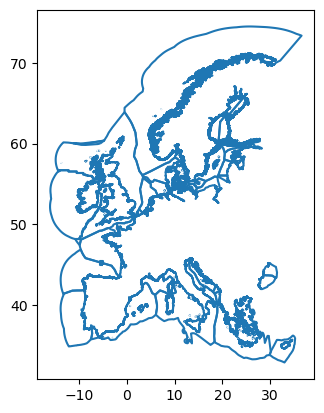

In [7]:
df_boundaries.boundary.plot()

In [10]:
deu = df_boundaries.loc[df_boundaries["iso_ter1"] == "DEU"]

In [37]:
# Load all exclusion shapes to generate potentials
# TODO: which crs?
# TODO: res determined by coarsest dataset?
excluder = atlite.ExclusionContainer()

excluder.add_geometry(natura2000)  # which crs?

max_depth = 60
func = functools.partial(np.greater, -max_depth)
excluder.add_raster(gebco, crs=4326, codes=func)  # which crs?

# TODO: Can I save data to plot potentials as shapefile? Or is it only available as raster data?
masked, transform = excluder.compute_shape_availability(df_boundaries)

In [44]:
excluder.rasters[0]["invert"] = False

In [50]:
cutout = atlite.Cutout(boundaries)
availability = cutout.availabilitymatrix(regions, excluder, **kwargs)

TypeError: Arguments 'time' and 'module' must be specified. Spatial bounds must either be passed via argument 'bounds' or 'x' and 'y'.

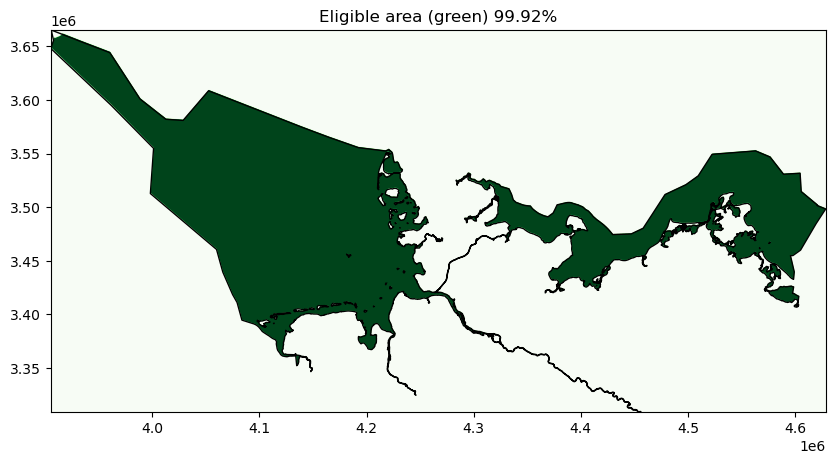

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
excluder.plot_shape_availability(deu)
plt.show()